In [2]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
import random
import matplotlib.patheffects as PathEffects
import sys
sys.path
sys.executable

'D:\\my_program\\anaconda\\envs\\py3tf14\\python.exe'

In [4]:
from keras.layers import Input, Conv2D, Lambda, Dense, Flatten,MaxPooling2D, concatenate
from keras.models import Model, Sequential
from keras.callbacks import CSVLogger, ModelCheckpoint, EarlyStopping
from keras.regularizers import l2
from keras import backend as K
from keras.optimizers import SGD,Adam
from keras.losses import binary_crossentropy
from keras import regularizers
import os
import pickle
import matplotlib.pyplot as plt

In [15]:
from itertools import permutations
import seaborn as sns
from keras.datasets import mnist
from sklearn.manifold import TSNE
from sklearn.svm import SVC

In [5]:
import cv2
import os
import numpy as np
from PIL import Image
import shutil

In [6]:
# Define our own plot function
def scatter(x, labels, num_of_labels, subtitle=None):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", num_of_labels))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    
    
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[labels.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    # 그래프 규격선, 여백공간 제거
    ax.axis('off') 
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(num_of_labels):
        # Add Label with txt type on plotting image
        xtext, ytext = np.median(x[labels == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
        
    if subtitle != None:
        plt.suptitle(subtitle)
        
    plt.savefig(subtitle)
    
def checkImgSet(msg, x_sample, y_sample, filename_sample, classes, maxnum):

    print(msg)
    for k in range(classes):
        plt.figure(figsize=(20,20))
    
        num=0
        for i in range(len(y_sample)):
            if num==maxnum:
                break
            if y_sample[i]==k:
                num+=1
                plt.subplot(10,10,num)
                plt.xticks([])
                plt.yticks([])
                plt.grid(False)
                plt.imshow(x_sample[i], cmap='gray', vmin=0, vmax=255)
                #plt.imshow(cv2.cvtColor(x_sample[i], cv2.COLOR_BGR2RGB))
                plt.xlabel(str(y_sample[i])+filename_sample[i][25:-10])
        plt.show()
        
def checkTripletImgSet(msg, triplet_sample, maxnum):

    print(msg)
    plt.figure(figsize=(15,15*maxnum))
    for i in range(min(maxnum, len(triplet_sample))):
        for j in range(3):
            plt.subplot(5*maxnum, 3,i*3+j+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(triplet_sample[i][j].reshape(28,28), cmap='gray', vmin=0, vmax=255)
            #plt.imshow(cv2.cvtColor(triplet_sample[i][j].reshape(28,28), cv2.COLOR_BGR2RGB))
    plt.show()

In [7]:
def divide_data():
    path = "C:\\Users\\tjems\\Desktop\\wine\\total"
    # Get directory has yoga poses
    DataPaths = [path+'\\'+folder_name for folder_name in os.listdir(path)]
    print(DataPaths)
    for label_idx in range(len(DataPaths)):
        LabelPath = DataPaths[label_idx]
        if not os.path.isdir(LabelPath+'\\test'):
            os.mkdir(LabelPath+'\\test')
        if not os.path.isdir(LabelPath+'\\train'):
            os.mkdir(LabelPath+'\\train')
            
    # Check each image folders. each image folder contains images with same yoga posture 
    for label_idx in range(len(DataPaths)):
        LabelPath = DataPaths[label_idx]
        if 'test' in LabelPath or 'train' in LabelPath:
            continue
        ImgNames = [image_name for image_name in os.listdir(LabelPath)]
        for img_idx in range(len(ImgNames)):
            path_from = LabelPath+'\\'+ImgNames[img_idx]
            if 'test' in path_from or 'train' in path_from:
                continue
            if img_idx%7 == 0:
                path_to = LabelPath+'\\test'
            else:
                path_to = LabelPath+'\\train'
            print(path_to)
            print(path_from)
            shutil.move(path_from, path_to)
    

In [8]:
divide_data()

['C:\\Users\\tjems\\Desktop\\wine\\total\\1', 'C:\\Users\\tjems\\Desktop\\wine\\total\\10', 'C:\\Users\\tjems\\Desktop\\wine\\total\\2', 'C:\\Users\\tjems\\Desktop\\wine\\total\\3', 'C:\\Users\\tjems\\Desktop\\wine\\total\\4', 'C:\\Users\\tjems\\Desktop\\wine\\total\\5', 'C:\\Users\\tjems\\Desktop\\wine\\total\\6', 'C:\\Users\\tjems\\Desktop\\wine\\total\\7', 'C:\\Users\\tjems\\Desktop\\wine\\total\\8', 'C:\\Users\\tjems\\Desktop\\wine\\total\\9']


In [9]:
def load_data(path, row, column, channel):
    x_train=[]
    y_train=[]
    filename_train=[]
    x_test=[]
    y_test=[]
    filename_test=[]
    # Get directory has yoga poseschannel
    DataPaths = [path+'\\'+folder_name for folder_name in os.listdir(path)]
    #print(DataPaths)
    # Check each image folders. each image folder contains images with same yoga posture 
    for label_idx in range(len(DataPaths)):
        LabelPath = DataPaths[label_idx]
        
        # Check each kinds of data. Training samples and Validation samples
        sample_kind=['\\train\\', '\\test\\']
        for k in range(2):
            ImgPaths = [LabelPath+sample_kind[k]+image_name for image_name in os.listdir(LabelPath+sample_kind[k])]
            for idx in range(len(ImgPaths)):
                imagePath = ImgPaths[idx]
                img = cv2.imread(imagePath, cv2.IMREAD_COLOR)
               
            
                cv2.imshow('img', img)

                if channel==1:
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                img = cv2.resize(img, (row,column), interpolation = cv2.INTER_AREA)
                
                if k==0:
                    x_train.append(img)
                    y_train.append(label_idx)
                    filename_train.append(imagePath)
                else:    
                    x_test.append(img)
                    y_test.append(label_idx)
                    filename_test.append(imagePath)
              
        
    return np.array(x_train), np.array(y_train), filename_train, np.array(x_test), np.array(y_test), filename_test

In [52]:
def nameing():
    path = "C:\\Users\\tjems\\Desktop\\wine\\total"
    DataPaths = [path+'\\'+folder_name for folder_name in os.listdir(path)]
    count2=1
    for label_idx in range(len(DataPaths)):
        LabelPath = DataPaths[label_idx]#each wine forder
        print(LabelPath)
        DataPaths_test =[LabelPath+'\\test\\' + image_name for image_name in os.listdir(LabelPath+'\\test')]
        #print(DataPaths_test)
        DataPaths_train=[LabelPath+'\\train\\' + image_name for image_name in os.listdir(LabelPath+'\\train')]
        #print(DataPaths_train)
        count=1
        for image_route in DataPaths_test:
            after=image_route.split('\\')
            after2=after[-1].split('.')
            os.rename(image_route,image_route[:image_route.find(after[-1])]+str(count)+'.'+after2[-1])
            count=count+1
            print (image_route)
            print(image_route[:image_route.find(after[-1])]+str(count)+'.'+after2[-1])
        count=1
        for image_route in DataPaths_train:
            after=image_route.split('\\')
            after2=after[-1].split('.')
            os.rename(image_route,image_route[:image_route.find(after[-1])]+str(count)+'.'+after2[-1])
            count=count+1
            print (image_route)
            print(image_route[:image_route.find(after[-1])]+str(count)+'.'+after2[-1])
            
        #after = LabelPath.split('\\')
        #os.rename(LabelPath,LabelPath[:LabelPath.find(after[-1])]+str(count2))
        #count2=count2+1
            #image_route.split('\\')
            #print(image_route)
        #os.rename(image_route,image_route[:image_route.find(after)]+count+'.'+image_route[-1])

nameing()
            
    

C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\test\Château de Beaucastel Châteauneuf-du-Pape_google_0.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\test\2.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\test\Château de Beaucastel Châteauneuf-du-Pape_google_104.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\test\3.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\test\Château de Beaucastel Châteauneuf-du-Pape_google_110.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\test\4.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\test\Château de Beaucastel Châteauneuf-du-Pape_google_12.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\test\5.jpg
C:\Users\tjems\Desktop\wine

C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\Château de Beaucastel Châteauneuf-du-Pape_google_120.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\20.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\Château de Beaucastel Châteauneuf-du-Pape_google_123.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\21.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\Château de Beaucastel Châteauneuf-du-Pape_google_124.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\22.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\Château de Beaucastel Châteauneuf-du-Pape_google_125.png
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\23.png
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\Châtea

C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\67.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\Château de Beaucastel Châteauneuf-du-Pape_google_189.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\68.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\Château de Beaucastel Châteauneuf-du-Pape_google_19.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\69.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\Château de Beaucastel Châteauneuf-du-Pape_google_190.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\70.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\Château de Beaucastel Châteauneuf-du-Pape_google_193.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\71.jpg


C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\114.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\Château de Beaucastel Châteauneuf-du-Pape_google_65.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\115.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\Château de Beaucastel Châteauneuf-du-Pape_google_67.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\116.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\Château de Beaucastel Châteauneuf-du-Pape_google_68.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\117.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\Château de Beaucastel Châteauneuf-du-Pape_google_69.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\118.jp

C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\Château de Beaucastel Châteauneuf-du-Pape_naver_8.jpg
C:\Users\tjems\Desktop\wine\total\Château de Beaucastel Châteauneuf-du-Pape\train\168.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\test\Château Léoville Barton St.-Julien_google_0.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\test\2.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\test\Château Léoville Barton St.-Julien_google_11.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\test\3.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\test\Château Léoville Barton St.-Julien_google_120.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\test\4.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\test\Château Léoville Barto

C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\Château Léoville Barton St.-Julien_google_144.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\31.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\Château Léoville Barton St.-Julien_google_146.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\32.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\Château Léoville Barton St.-Julien_google_147.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\33.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\Château Léoville Barton St.-Julien_google_149.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\34.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\Château Léoville Barton St.-Julien_google_15.jpg
C:\Users\tjems\Desktop\wine\total\Château Léovil

C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\Château Léoville Barton St.-Julien_google_283.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\118.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\Château Léoville Barton St.-Julien_google_284.jpeg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\119.jpeg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\Château Léoville Barton St.-Julien_google_286.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\120.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\Château Léoville Barton St.-Julien_google_289.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\121.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\Château Léoville Barton St.-Julien_google_290.jpg
C:\Users\tjems\Desktop\wine\total\Château

C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\167.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\Château Léoville Barton St.-Julien_google_87.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\168.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\Château Léoville Barton St.-Julien_google_88.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\169.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\Château Léoville Barton St.-Julien_google_94.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\170.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\Château Léoville Barton St.-Julien_google_95.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\171.jpg
C:\Users\tjems\Desktop\wine\total\Château Léoville Barton St.-Julien\train\Château Léovil

C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\test\Château Pichon Baron Pauillac_google_49.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\test\27.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\test\Château Pichon Baron Pauillac_google_64.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\test\28.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\test\Château Pichon Baron Pauillac_google_82.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\test\29.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\test\Château Pichon Baron Pauillac_google_92.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\test\30.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\test\Château Pichon Baron Pauillac_naver_14.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\test\31.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron P

C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\train\Château Pichon Baron Pauillac_google_244.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\train\74.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\train\Château Pichon Baron Pauillac_google_245.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\train\75.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\train\Château Pichon Baron Pauillac_google_246.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\train\76.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\train\Château Pichon Baron Pauillac_google_247.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\train\77.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\train\Château Pichon Baron Pauillac_google_25.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\train\78.jpg
C:\Users\tjems\Desktop\wine\total\Château

C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\train\Château Pichon Baron Pauillac_google_65.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\train\158.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\train\Château Pichon Baron Pauillac_google_68.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\train\159.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\train\Château Pichon Baron Pauillac_google_7.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\train\160.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\train\Château Pichon Baron Pauillac_google_74.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\train\161.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\train\Château Pichon Baron Pauillac_google_79.jpg
C:\Users\tjems\Desktop\wine\total\Château Pichon Baron Pauillac\train\162.jpg
C:\Users\tjems\Desktop\wine\total\Château

C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\Groth Cabernet Sauvignon Oakville Reserve_google_143.jpg
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\35.jpg
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\Groth Cabernet Sauvignon Oakville Reserve_google_144.png
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\36.png
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\Groth Cabernet Sauvignon Oakville Reserve_google_147.jpg
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\37.jpg
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\Groth Cabernet Sauvignon Oakville Reserve_google_15.jpg
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\38.jpg
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\Groth C

C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\Groth Cabernet Sauvignon Oakville Reserve_google_227.jpg
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\73.jpg
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\Groth Cabernet Sauvignon Oakville Reserve_google_23.jpg
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\74.jpg
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\Groth Cabernet Sauvignon Oakville Reserve_google_231.jpg
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\75.jpg
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\Groth Cabernet Sauvignon Oakville Reserve_google_233.jpg
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\76.jpg
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\Groth C

C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\Groth Cabernet Sauvignon Oakville Reserve_google_47.jpg
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\113.jpg
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\Groth Cabernet Sauvignon Oakville Reserve_google_48.png
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\114.png
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\Groth Cabernet Sauvignon Oakville Reserve_google_5.png
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\115.png
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\Groth Cabernet Sauvignon Oakville Reserve_google_51.jpg
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\116.jpg
C:\Users\tjems\Desktop\wine\total\Groth Cabernet Sauvignon Oakville Reserve\train\Groth C

C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\test\Mayacamas Cabernet Sauvignon Mount Veeder_google_124.jpg
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\test\4.jpg
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\test\Mayacamas Cabernet Sauvignon Mount Veeder_google_14.jpg
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\test\5.jpg
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\test\Mayacamas Cabernet Sauvignon Mount Veeder_google_17.jpg
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\test\6.jpg
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\test\Mayacamas Cabernet Sauvignon Mount Veeder_google_19.jpg
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\test\7.jpg
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\test\Mayacamas Cabernet Sau

C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\train\Mayacamas Cabernet Sauvignon Mount Veeder_google_3.jpg
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\train\62.jpg
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\train\Mayacamas Cabernet Sauvignon Mount Veeder_google_30.png
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\train\63.png
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\train\Mayacamas Cabernet Sauvignon Mount Veeder_google_301.jpg
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\train\64.jpg
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\train\Mayacamas Cabernet Sauvignon Mount Veeder_google_31.jpg
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\train\65.jpg
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\train\Mayacamas 

C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\train\Mayacamas Cabernet Sauvignon Mount Veeder_naver_14.jpg
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\train\105.jpg
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\train\Mayacamas Cabernet Sauvignon Mount Veeder_naver_15.jpg
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\train\106.jpg
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\train\Mayacamas Cabernet Sauvignon Mount Veeder_naver_31.jpg
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\train\107.jpg
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\train\Mayacamas Cabernet Sauvignon Mount Veeder_naver_32.jpg
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\train\108.jpg
C:\Users\tjems\Desktop\wine\total\Mayacamas Cabernet Sauvignon Mount Veeder\train\Mayacamas 

C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\Penfolds Shiraz Barossa Valley RWT Bin 798_google_133.jpg
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\20.jpg
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\Penfolds Shiraz Barossa Valley RWT Bin 798_google_135.jpg
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\21.jpg
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\Penfolds Shiraz Barossa Valley RWT Bin 798_google_136.jpg
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\22.jpg
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\Penfolds Shiraz Barossa Valley RWT Bin 798_google_138.jpg
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\23.jpg
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798

C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\Penfolds Shiraz Barossa Valley RWT Bin 798_google_242.png
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\80.png
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\Penfolds Shiraz Barossa Valley RWT Bin 798_google_243.jpg
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\81.jpg
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\Penfolds Shiraz Barossa Valley RWT Bin 798_google_246.jpg
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\82.jpg
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\Penfolds Shiraz Barossa Valley RWT Bin 798_google_247.jpg
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\83.jpg
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798

C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\Penfolds Shiraz Barossa Valley RWT Bin 798_google_57.jpg
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\130.jpg
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\Penfolds Shiraz Barossa Valley RWT Bin 798_google_58.jpg
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\131.jpg
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\Penfolds Shiraz Barossa Valley RWT Bin 798_google_59.jpg
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\132.jpg
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\Penfolds Shiraz Barossa Valley RWT Bin 798_google_6.png
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\train\133.png
C:\Users\tjems\Desktop\wine\total\Penfolds Shiraz Barossa Valley RWT Bin 798\

C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\test\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard_google_214.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\test\11.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\test\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard_google_228.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\test\12.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\test\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard_google_245.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\test\13.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\test\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard_google_257.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hy

C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\train\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard_google_155.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\train\32.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\train\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard_google_158.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\train\33.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\train\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard_google_16.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\train\34.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\train\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard_google_168.jpeg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carn

C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\train\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard_google_289.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\train\84.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\train\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard_google_29.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\train\85.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\train\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard_google_3.png
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\train\86.png
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\train\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard_google_30.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros

C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\train\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard_naver_19.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\train\137.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\train\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard_naver_20.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\train\138.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\train\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard_naver_28.jpg
C:\Users\tjems\Desktop\wine\total\Ramey Chardonnay Napa Valley Carneros Hyde Vineyard\train\139.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\test\Roederer Estate Brut Anderson Valley L'Ermitage_google_1.png

C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\Roederer Estate Brut Anderson Valley L'Ermitage_google_100.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\3.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\Roederer Estate Brut Anderson Valley L'Ermitage_google_101.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\4.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\Roederer Estate Brut Anderson Valley L'Ermitage_google_102.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\5.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\Roederer Estate Brut Anderson Valley L'Ermitage_google_103.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\6.jpg
C:\Users\tjems\Deskt

C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\Roederer Estate Brut Anderson Valley L'Ermitage_google_149.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\41.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\Roederer Estate Brut Anderson Valley L'Ermitage_google_15.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\42.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\Roederer Estate Brut Anderson Valley L'Ermitage_google_150.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\43.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\Roederer Estate Brut Anderson Valley L'Ermitage_google_155.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\44.jpg
C:\Users\tjems\De

C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\Roederer Estate Brut Anderson Valley L'Ermitage_google_242.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\86.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\Roederer Estate Brut Anderson Valley L'Ermitage_google_243.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\87.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\Roederer Estate Brut Anderson Valley L'Ermitage_google_244.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\88.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\Roederer Estate Brut Anderson Valley L'Ermitage_google_245.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\89.jpg
C:\Users\tjems\D

C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\Roederer Estate Brut Anderson Valley L'Ermitage_google_304.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\122.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\Roederer Estate Brut Anderson Valley L'Ermitage_google_306.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\123.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\Roederer Estate Brut Anderson Valley L'Ermitage_google_308.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\124.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\Roederer Estate Brut Anderson Valley L'Ermitage_google_310.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\125.jpg
C:\Users\tje

C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\Roederer Estate Brut Anderson Valley L'Ermitage_google_7.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\166.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\Roederer Estate Brut Anderson Valley L'Ermitage_google_71.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\167.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\Roederer Estate Brut Anderson Valley L'Ermitage_google_73.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\168.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\Roederer Estate Brut Anderson Valley L'Ermitage_google_75.jpg
C:\Users\tjems\Desktop\wine\total\Roederer Estate Brut Anderson Valley L'Ermitage\train\169.jpg
C:\Users\tjems\De

C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\test\San Giusto a Rentennano Chianti Classico_google_26.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\test\13.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\test\San Giusto a Rentennano Chianti Classico_google_32.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\test\14.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\test\San Giusto a Rentennano Chianti Classico_google_4.png
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\test\15.png
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\test\San Giusto a Rentennano Chianti Classico_google_49.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\test\16.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\test\San Giusto a Rentennano Chianti C

C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\25.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\San Giusto a Rentennano Chianti Classico_google_14.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\26.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\San Giusto a Rentennano Chianti Classico_google_142.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\27.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\San Giusto a Rentennano Chianti Classico_google_143.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\28.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\San Giusto a Rentennano Chianti Classico_google_15.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\29.jpg
C:\Users\tjems

C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\San Giusto a Rentennano Chianti Classico_google_27.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\68.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\San Giusto a Rentennano Chianti Classico_google_28.png
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\69.png
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\San Giusto a Rentennano Chianti Classico_google_29.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\70.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\San Giusto a Rentennano Chianti Classico_google_3.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\71.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\San Giusto a Rentennano 

C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\San Giusto a Rentennano Chianti Classico_google_88.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\112.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\San Giusto a Rentennano Chianti Classico_google_89.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\113.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\San Giusto a Rentennano Chianti Classico_google_9.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\114.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\San Giusto a Rentennano Chianti Classico_google_90.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\115.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\San Giusto a Rentenn

C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\San Giusto a Rentennano Chianti Classico_naver_74.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\156.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\San Giusto a Rentennano Chianti Classico_naver_75.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\157.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\San Giusto a Rentennano Chianti Classico_naver_77.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\158.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\San Giusto a Rentennano Chianti Classico_naver_78.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\159.jpg
C:\Users\tjems\Desktop\wine\total\San Giusto a Rentennano Chianti Classico\train\San Giusto a Rentennano

C:\Users\tjems\Desktop\wine\total\Viña Almaviva Puente Alto\train\Viña Almaviva Puente Alto_google_186.jpg
C:\Users\tjems\Desktop\wine\total\Viña Almaviva Puente Alto\train\50.jpg
C:\Users\tjems\Desktop\wine\total\Viña Almaviva Puente Alto\train\Viña Almaviva Puente Alto_google_187.jpg
C:\Users\tjems\Desktop\wine\total\Viña Almaviva Puente Alto\train\51.jpg
C:\Users\tjems\Desktop\wine\total\Viña Almaviva Puente Alto\train\Viña Almaviva Puente Alto_google_188.jpg
C:\Users\tjems\Desktop\wine\total\Viña Almaviva Puente Alto\train\52.jpg
C:\Users\tjems\Desktop\wine\total\Viña Almaviva Puente Alto\train\Viña Almaviva Puente Alto_google_190.jpg
C:\Users\tjems\Desktop\wine\total\Viña Almaviva Puente Alto\train\53.jpg
C:\Users\tjems\Desktop\wine\total\Viña Almaviva Puente Alto\train\Viña Almaviva Puente Alto_google_191.png
C:\Users\tjems\Desktop\wine\total\Viña Almaviva Puente Alto\train\54.png
C:\Users\tjems\Desktop\wine\total\Viña Almaviva Puente Alto\train\Viña Almaviva Puente Alto_google_1

C:\Users\tjems\Desktop\wine\total\Viña Almaviva Puente Alto\train\Viña Almaviva Puente Alto_google_294.jpg
C:\Users\tjems\Desktop\wine\total\Viña Almaviva Puente Alto\train\101.jpg
C:\Users\tjems\Desktop\wine\total\Viña Almaviva Puente Alto\train\Viña Almaviva Puente Alto_google_295.jpg
C:\Users\tjems\Desktop\wine\total\Viña Almaviva Puente Alto\train\102.jpg
C:\Users\tjems\Desktop\wine\total\Viña Almaviva Puente Alto\train\Viña Almaviva Puente Alto_google_297.jpg
C:\Users\tjems\Desktop\wine\total\Viña Almaviva Puente Alto\train\103.jpg
C:\Users\tjems\Desktop\wine\total\Viña Almaviva Puente Alto\train\Viña Almaviva Puente Alto_google_298.jpg
C:\Users\tjems\Desktop\wine\total\Viña Almaviva Puente Alto\train\104.jpg
C:\Users\tjems\Desktop\wine\total\Viña Almaviva Puente Alto\train\Viña Almaviva Puente Alto_google_3.jpeg
C:\Users\tjems\Desktop\wine\total\Viña Almaviva Puente Alto\train\105.jpeg
C:\Users\tjems\Desktop\wine\total\Viña Almaviva Puente Alto\train\Viña Almaviva Puente Alto_goo

In [11]:
img_row=28
img_column=28
img_channel=1
path = "C:\\Users\\tjems\\Desktop\\wine\\total"



x_train, y_train, filename_train, x_test, y_test, filename_test = load_data(path,img_row, img_column, img_channel)
x_total = np.array(np.concatenate((x_train, x_test), axis = 0))
y_total = np.array(np.concatenate((y_train, y_test), axis = 0))
filename_total = np.concatenate((filename_train, filename_test), axis = 0)


In [12]:
x_train_flat = x_train.reshape(-1,img_row*img_column*img_channel)
x_test_flat = x_test.reshape(-1,img_row*img_column*img_channel)                           
x_total_flat = x_total.reshape(-1,img_row*img_column*img_channel)

Training Samples


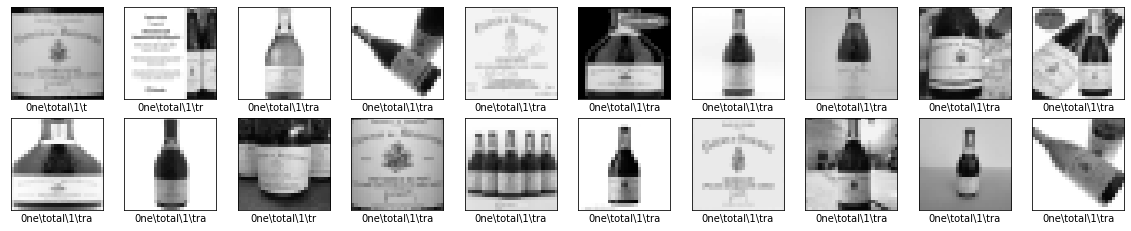

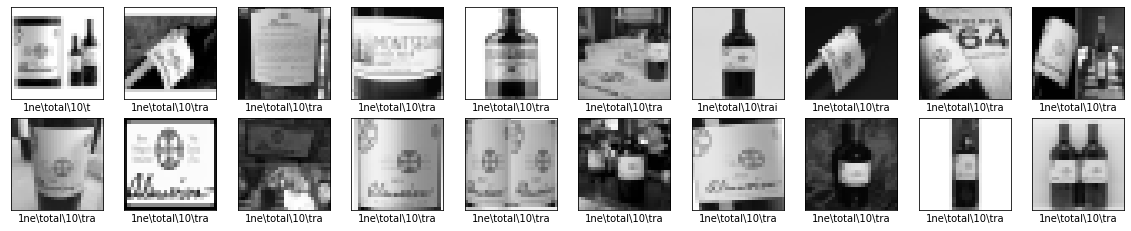

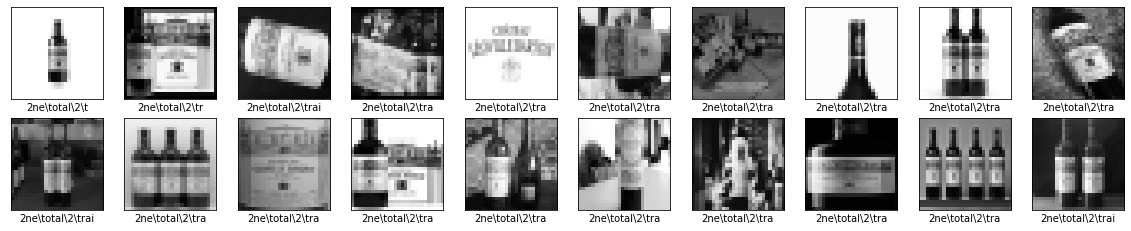

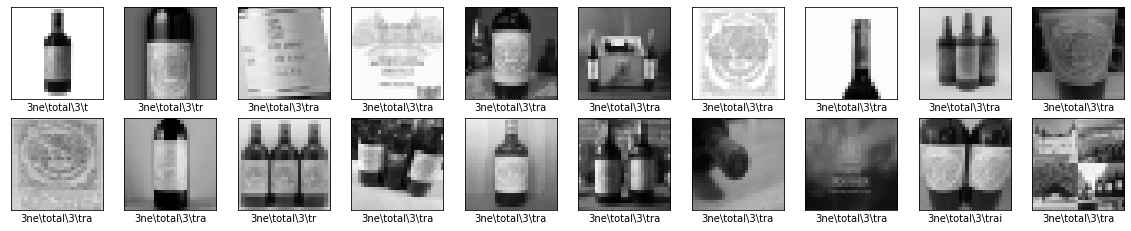

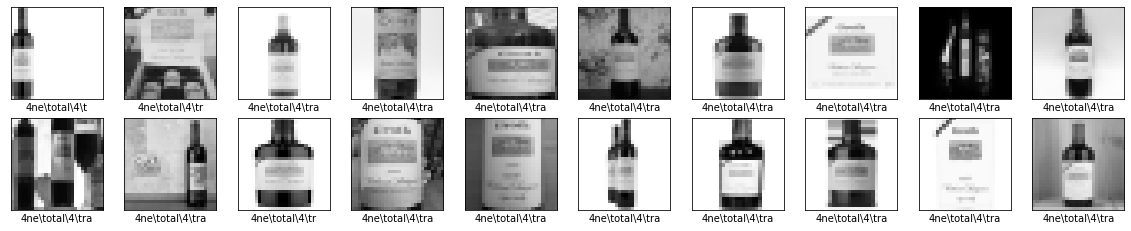

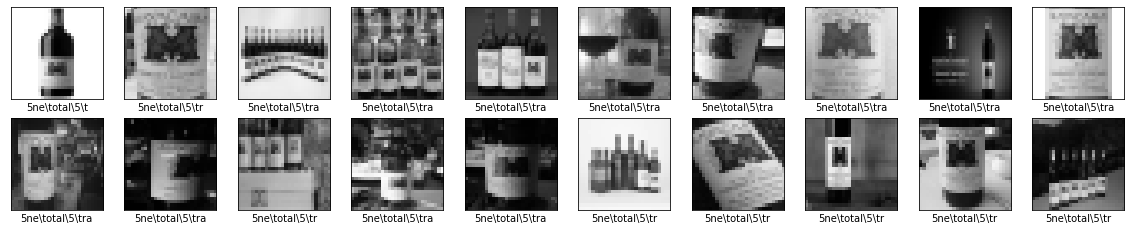

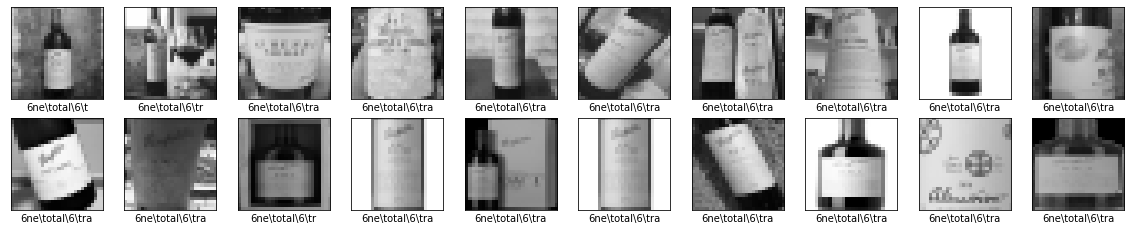

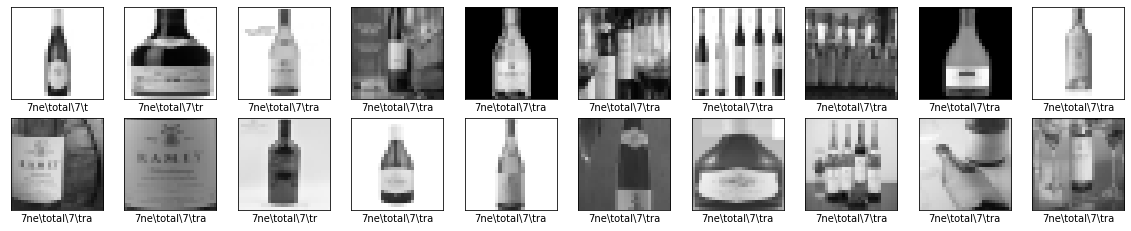

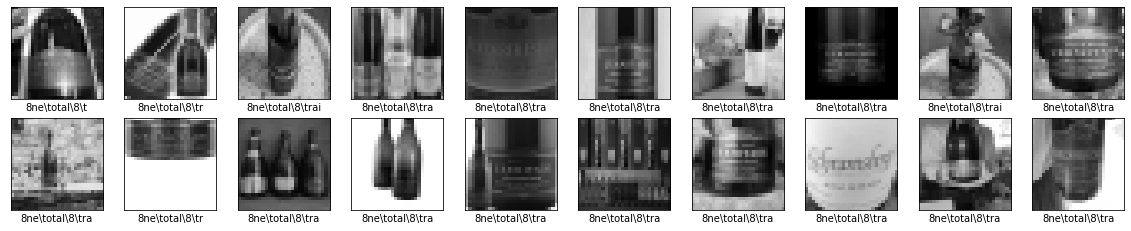

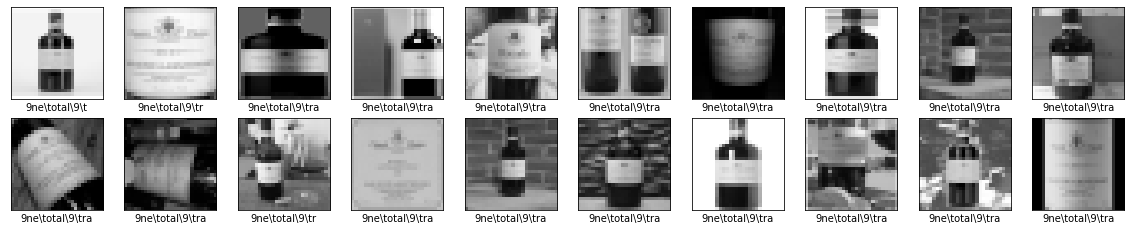

Validation Samples


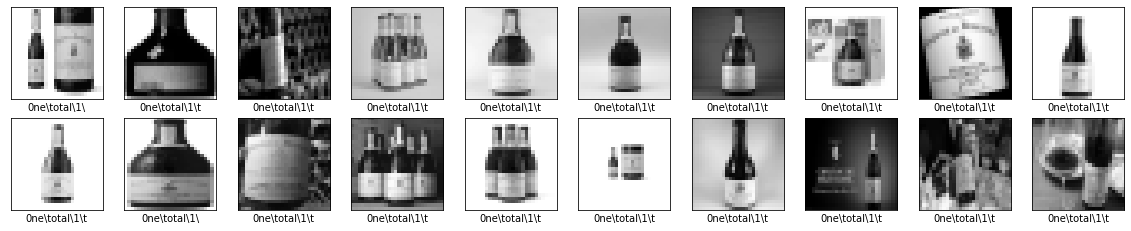

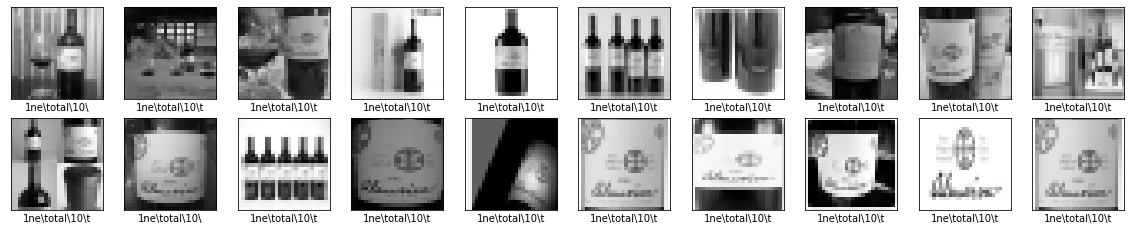

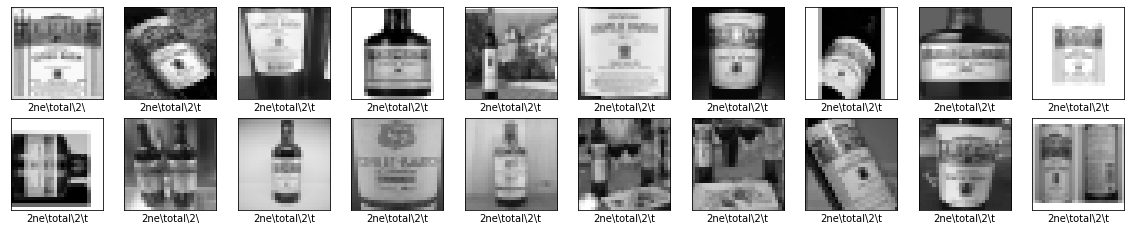

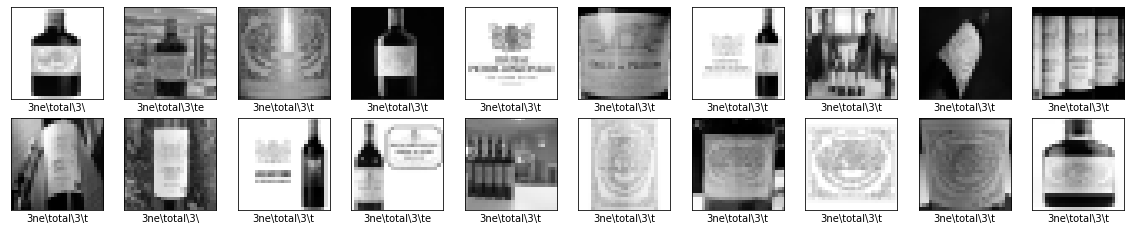

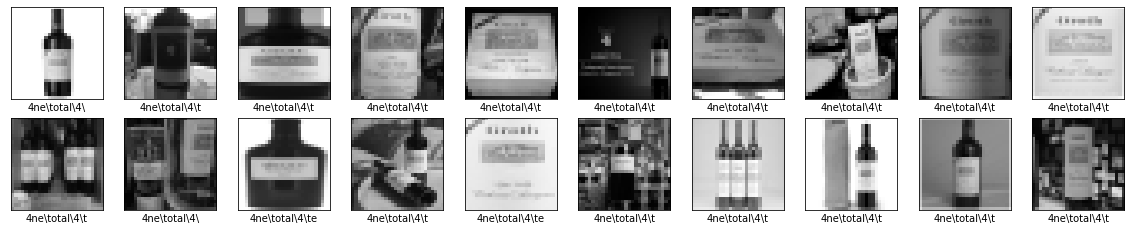

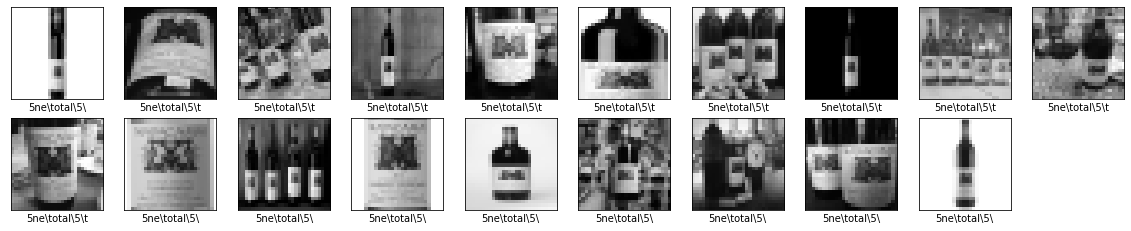

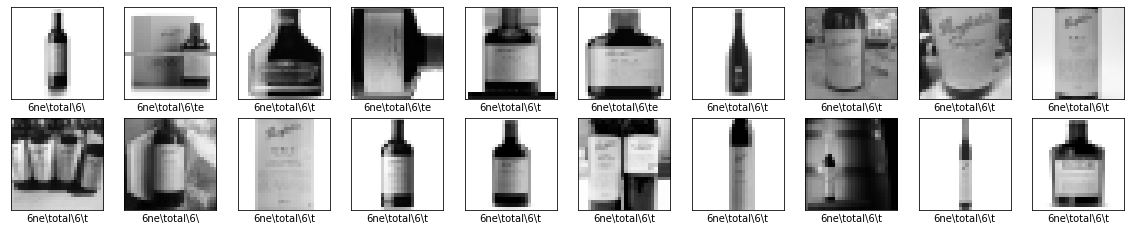

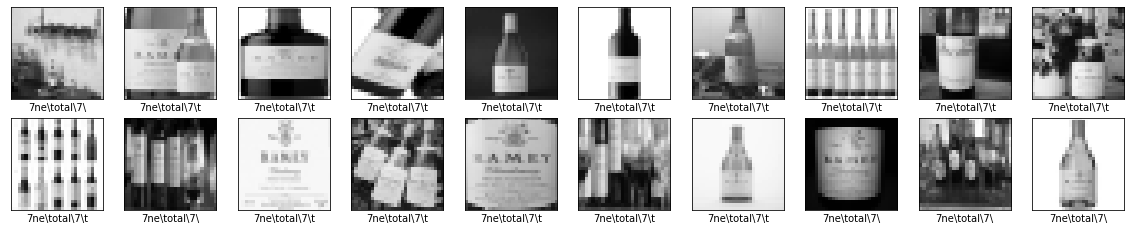

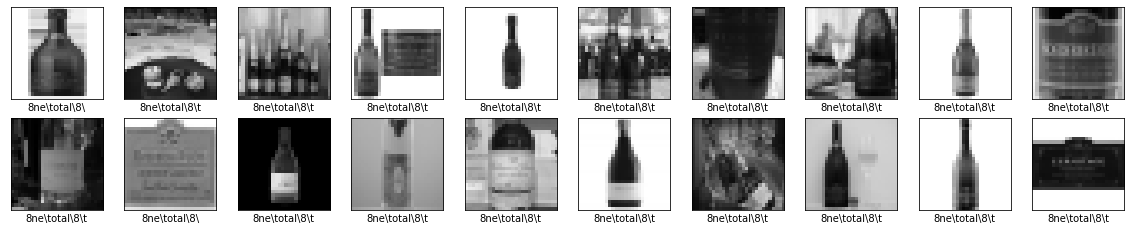

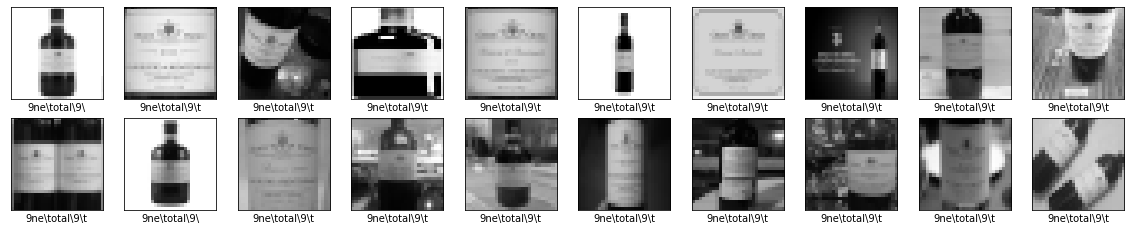

In [13]:
checkImgSet("Training Samples", x_train, y_train, filename_train, 10, 20)
checkImgSet("Validation Samples", x_test, y_test, filename_test, 10, 20)

D:\my_program\anaconda\envs\py3tf14\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
D:\my_program\anaconda\envs\py3tf14\lib\site-packages\numpy\core\_methods.py:154: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy sh

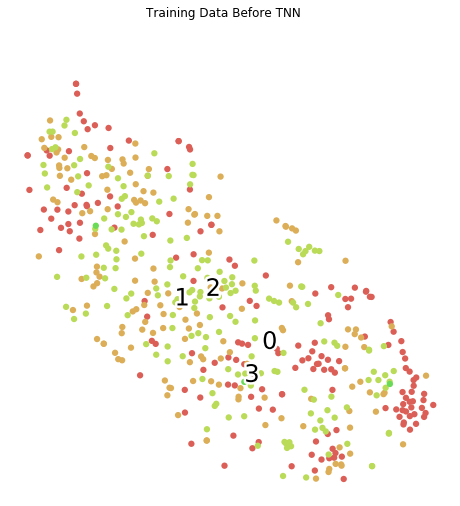

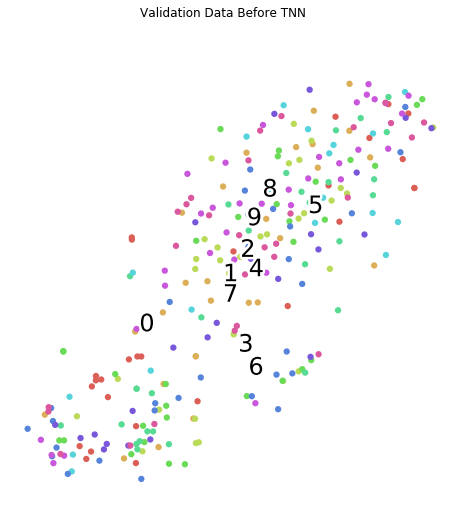

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


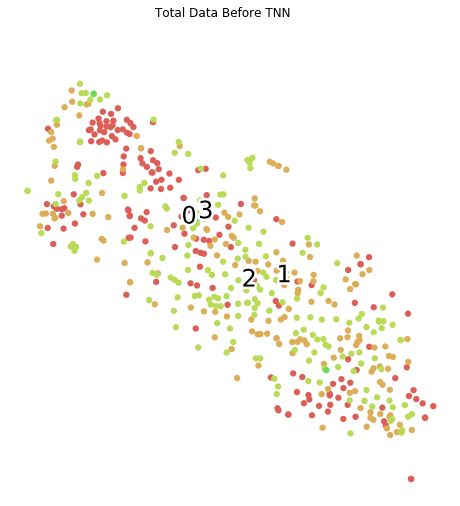

In [20]:
tsne = TSNE()
train_tsne_embeds = tsne.fit_transform(x_train_flat[:512])
eval_tsne_embeds = tsne.fit_transform(x_test_flat[:300])
total_tsne_embeds = tsne.fit_transform(x_total_flat[:512])
scatter(train_tsne_embeds, y_train[:512], 10, "Training Data Before TNN")
scatter(eval_tsne_embeds, y_test[:512], 10, "Validation Data Before TNN")
scatter(total_tsne_embeds, y_total[:512], 10,"Total Data Before TNN")